In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 

In [96]:
# Cargar dataset
df_rrhh = pd.read_csv(r"C:\it_academy\ProjecteData - Materiales\Sprint03\DF-RRHH_15072025.csv", sep=',', encoding='utf-8')

df_rrhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       1110 non-null   int64 
 1   Reason_absence           1110 non-null   int64 
 2   Month_absence            1110 non-null   int64 
 3   Day_week                 1110 non-null   int64 
 4   Seasons                  1110 non-null   int64 
 5   Transportation_expense   1110 non-null   int64 
 6   Distance_Residence_Work  1110 non-null   int64 
 7   Service_time             1110 non-null   int64 
 8   Age                      1110 non-null   int64 
 9   Work_load_Average_day    1110 non-null   object
 10  Hit_target               1110 non-null   int64 
 11  Disciplinary_failure     1110 non-null   int64 
 12  Education                1110 non-null   int64 
 13  Son                      1110 non-null   int64 
 14  Social_drinker           1110 non-null  

In [153]:
df_rrhh.isnull().sum()

ID                         0
Reason_absence             0
Month_absence              0
Day_week                   0
Seasons                    0
Transportation_expense     0
Distance_Residence_Work    0
Service_time               0
Age                        0
Work_load_Average_day      0
Hit_target                 0
Disciplinary_failure       0
Education                  0
Son                        0
Social_drinker             0
Social_smoker              0
Pet                        0
Weight                     0
Height                     0
Body_mass_index            0
Absenteeism_hours          0
dtype: int64

In [98]:
# Revisar si hay registros duplcados exactos: 54
df_rrhh.duplicated().sum()

np.int64(54)

In [99]:
duplicates = df_rrhh[df_rrhh.duplicated()]
duplicates

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
92,10,22,12,4,4,361,52,3,28,"261,306",...,0,1,1,1,0,4,80,172,27,8
348,34,23,10,3,4,118,10,10,37,"253,465",...,0,1,0,0,0,0,83,172,28,3
383,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
386,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
387,3,27,2,6,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
388,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
389,3,27,2,6,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
396,22,23,5,4,3,179,26,9,30,"246,074",...,0,3,0,0,0,0,56,171,19,3
412,28,23,12,4,4,225,26,9,28,"280,549",...,0,1,1,0,0,2,69,169,24,3
431,3,27,3,5,2,179,51,18,38,"222,196",...,0,1,0,1,0,0,89,170,31,3


In [100]:
# Elimino duplicados
df_rrhh = df_rrhh.drop_duplicates()
df_rrhh.info()
df_rrhh.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       1056 non-null   int64 
 1   Reason_absence           1056 non-null   int64 
 2   Month_absence            1056 non-null   int64 
 3   Day_week                 1056 non-null   int64 
 4   Seasons                  1056 non-null   int64 
 5   Transportation_expense   1056 non-null   int64 
 6   Distance_Residence_Work  1056 non-null   int64 
 7   Service_time             1056 non-null   int64 
 8   Age                      1056 non-null   int64 
 9   Work_load_Average_day    1056 non-null   object
 10  Hit_target               1056 non-null   int64 
 11  Disciplinary_failure     1056 non-null   int64 
 12  Education                1056 non-null   int64 
 13  Son                      1056 non-null   int64 
 14  Social_drinker           1056 non-null   int6

np.int64(0)

In [101]:
df_rrhh = df_rrhh.sort_values(by='ID').reset_index(drop=True)
df_rrhh

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,22,7,2,1,235,11,14,37,"239,554",...,0,3,1,0,0,1,88,172,29,8
1,1,22,5,2,3,235,11,14,37,"237,656",...,0,3,1,0,0,1,88,172,29,8
2,1,23,8,5,1,235,11,14,37,"205,917",...,0,3,1,0,0,1,88,172,29,4
3,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
4,1,23,8,3,1,235,11,14,37,"249,797",...,0,3,1,0,0,1,88,172,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23,9,2,1,118,10,10,37,"241,476",...,0,1,0,0,0,0,83,172,28,4
1052,383,22,3,3,2,378,49,11,36,"244,387",...,0,1,2,0,1,4,65,174,21,8
1053,384,5,7,6,1,118,10,10,37,"275,312",...,0,1,0,0,0,0,83,172,28,8
1054,385,27,2,5,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,3


In [102]:
df_rrhh['ID'] = df_rrhh['ID'].astype(str).str.strip()
df_rrhh['Education'] = df_rrhh['Education'].astype(str).str.strip()
df_rrhh['Reason_absence'] = df_rrhh['Reason_absence'].astype(str).str.strip()
df_rrhh['Social_drinker'] = df_rrhh['Social_drinker'].astype(bool)
df_rrhh['Social_smoker'] = df_rrhh['Social_smoker'].astype(bool)
df_rrhh['Disciplinary_failure'] = df_rrhh['Disciplinary_failure'].astype(bool)
df_rrhh['Work_load_Average_day'] = df_rrhh['Work_load_Average_day'].astype(str).str.replace(',', '.', regex=False).astype(float)

df_rrhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1056 non-null   object 
 1   Reason_absence           1056 non-null   object 
 2   Month_absence            1056 non-null   int64  
 3   Day_week                 1056 non-null   int64  
 4   Seasons                  1056 non-null   int64  
 5   Transportation_expense   1056 non-null   int64  
 6   Distance_Residence_Work  1056 non-null   int64  
 7   Service_time             1056 non-null   int64  
 8   Age                      1056 non-null   int64  
 9   Work_load_Average_day    1056 non-null   float64
 10  Hit_target               1056 non-null   int64  
 11  Disciplinary_failure     1056 non-null   bool   
 12  Education                1056 non-null   object 
 13  Son                      1056 non-null   int64  
 14  Social_drinker          

In [103]:
# Verifico que los valores de Month_abcense estén dentro del rango del 1 al 12: Hay registroa con valor 0 (fuera del rango)
df_rrhh['Month_absence'].unique()

array([ 7,  5,  8,  4, 12,  3,  6, 11,  1, 10,  9,  2,  0])

In [104]:
# Verifico que los valores de Day_week estén dentro del rango del 2 al 6
df_rrhh['Day_week'].unique()

array([2, 5, 3, 6, 4])

In [105]:
# Revisión de variables categoricas.  
# Hay valores 0 en Reasons_absence (fuera de rango)
category_columns = df_rrhh.select_dtypes(include=object)
for column in category_columns:
    print(f"Column: {column}")
    print(f"Unique values ({df_rrhh[column].nunique()}): {df_rrhh[column].unique()}")
    print("---"*30)

Column: ID
Unique values (386): ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177' 

In [106]:
df_rrhh

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,22,7,2,1,235,11,14,37,239.554,...,False,3,1,False,False,1,88,172,29,8
1,1,22,5,2,3,235,11,14,37,237.656,...,False,3,1,False,False,1,88,172,29,8
2,1,23,8,5,1,235,11,14,37,205.917,...,False,3,1,False,False,1,88,172,29,4
3,1,11,7,3,1,235,11,14,37,264.604,...,False,3,1,False,False,1,88,172,29,4
4,1,23,8,3,1,235,11,14,37,249.797,...,False,3,1,False,False,1,88,172,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23,9,2,1,118,10,10,37,241.476,...,False,1,0,False,False,0,83,172,28,4
1052,383,22,3,3,2,378,49,11,36,244.387,...,False,1,2,False,True,4,65,174,21,8
1053,384,5,7,6,1,118,10,10,37,275.312,...,False,1,0,False,False,0,83,172,28,8
1054,385,27,2,5,2,179,51,18,38,264.249,...,False,1,0,True,False,0,89,170,31,3


In [107]:
df_absences = df_rrhh.copy()
df_rrhh[df_rrhh['Month_absence'] == 0]

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
126,4,0,0,3,1,118,14,13,40,271.219,...,False,1,1,True,False,8,98,170,34,0
160,8,0,0,4,2,231,35,14,39,271.219,...,False,1,2,True,False,2,100,170,35,0
671,35,0,0,6,3,179,45,14,53,271.219,...,False,1,1,False,False,1,77,175,25,0
802,133,0,0,3,1,118,14,13,40,271.219,...,False,1,1,True,False,8,98,170,34,0
862,193,0,0,4,2,231,35,14,39,271.219,...,False,1,2,True,False,2,100,170,35,0
938,269,0,0,3,1,118,14,13,40,271.219,...,False,1,1,True,False,8,98,170,34,0


In [108]:
#Excluyo registros donde Month_absence = 0
df_absences = df_rrhh[df_rrhh['Month_absence'] != 0]
df_absences.info()
df_absences.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1055
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1050 non-null   object 
 1   Reason_absence           1050 non-null   object 
 2   Month_absence            1050 non-null   int64  
 3   Day_week                 1050 non-null   int64  
 4   Seasons                  1050 non-null   int64  
 5   Transportation_expense   1050 non-null   int64  
 6   Distance_Residence_Work  1050 non-null   int64  
 7   Service_time             1050 non-null   int64  
 8   Age                      1050 non-null   int64  
 9   Work_load_Average_day    1050 non-null   float64
 10  Hit_target               1050 non-null   int64  
 11  Disciplinary_failure     1050 non-null   bool   
 12  Education                1050 non-null   object 
 13  Son                      1050 non-null   int64  
 14  Social_drinker           1050

(1050, 21)

In [109]:
season_dict = {
    1: 'winter',
    2: 'summer',
    3: 'autumn',
    4: 'spring'
}

df_absences['Season_name'] = df_absences['Seasons'].map(season_dict)

df_absences

C:\Users\eniom\AppData\Local\Temp\ipykernel_22768\1736591687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absences['Season_name'] = df_absences['Seasons'].map(season_dict)


,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
0,1,22,7,2,1,235,11,14,37,239.554,...,3,1,False,False,1,88,172,29,8,winter
1,1,22,5,2,3,235,11,14,37,237.656,...,3,1,False,False,1,88,172,29,8,autumn
2,1,23,8,5,1,235,11,14,37,205.917,...,3,1,False,False,1,88,172,29,4,winter
3,1,11,7,3,1,235,11,14,37,264.604,...,3,1,False,False,1,88,172,29,4,winter
4,1,23,8,3,1,235,11,14,37,249.797,...,3,1,False,False,1,88,172,29,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23,9,2,1,118,10,10,37,241.476,...,1,0,False,False,0,83,172,28,4,winter
1052,383,22,3,3,2,378,49,11,36,244.387,...,1,2,False,True,4,65,174,21,8,summer
1053,384,5,7,6,1,118,10,10,37,275.312,...,1,0,False,False,0,83,172,28,8,winter
1054,385,27,2,5,2,179,51,18,38,264.249,...,1,0,True,False,0,89,170,31,3,summer


In [110]:
month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

df_absences['Month_absence'] = df_absences['Month_absence'].map(month_dict)

df_absences

C:\Users\eniom\AppData\Local\Temp\ipykernel_22768\1414972504.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absences['Month_absence'] = df_absences['Month_absence'].map(month_dict)


,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
0,1,22,Jul,2,1,235,11,14,37,239.554,...,3,1,False,False,1,88,172,29,8,winter
1,1,22,May,2,3,235,11,14,37,237.656,...,3,1,False,False,1,88,172,29,8,autumn
2,1,23,Aug,5,1,235,11,14,37,205.917,...,3,1,False,False,1,88,172,29,4,winter
3,1,11,Jul,3,1,235,11,14,37,264.604,...,3,1,False,False,1,88,172,29,4,winter
4,1,23,Aug,3,1,235,11,14,37,249.797,...,3,1,False,False,1,88,172,29,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23,Sep,2,1,118,10,10,37,241.476,...,1,0,False,False,0,83,172,28,4,winter
1052,383,22,Mar,3,2,378,49,11,36,244.387,...,1,2,False,True,4,65,174,21,8,summer
1053,384,5,Jul,6,1,118,10,10,37,275.312,...,1,0,False,False,0,83,172,28,8,winter
1054,385,27,Feb,5,2,179,51,18,38,264.249,...,1,0,True,False,0,89,170,31,3,summer


In [111]:
day_dict = {
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri'
    }

df_absences['Day_week'] = df_absences['Day_week'].map(day_dict)

df_absences

C:\Users\eniom\AppData\Local\Temp\ipykernel_22768\2784873600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absences['Day_week'] = df_absences['Day_week'].map(day_dict)


,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
0,1,22,Jul,Mon,1,235,11,14,37,239.554,...,3,1,False,False,1,88,172,29,8,winter
1,1,22,May,Mon,3,235,11,14,37,237.656,...,3,1,False,False,1,88,172,29,8,autumn
2,1,23,Aug,Thu,1,235,11,14,37,205.917,...,3,1,False,False,1,88,172,29,4,winter
3,1,11,Jul,Tue,1,235,11,14,37,264.604,...,3,1,False,False,1,88,172,29,4,winter
4,1,23,Aug,Tue,1,235,11,14,37,249.797,...,3,1,False,False,1,88,172,29,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23,Sep,Mon,1,118,10,10,37,241.476,...,1,0,False,False,0,83,172,28,4,winter
1052,383,22,Mar,Tue,2,378,49,11,36,244.387,...,1,2,False,True,4,65,174,21,8,summer
1053,384,5,Jul,Fri,1,118,10,10,37,275.312,...,1,0,False,False,0,83,172,28,8,winter
1054,385,27,Feb,Thu,2,179,51,18,38,264.249,...,1,0,True,False,0,89,170,31,3,summer


In [112]:
df_absences[df_absences['Reason_absence'] == '0']

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
15,1,0,Mar,Thu,3,235,11,14,37,244.387,...,3,1,False,False,1,88,172,29,0,autumn
26,2,0,Jun,Mon,3,235,29,12,48,275.089,...,1,1,False,True,5,88,163,33,0,autumn
28,2,0,Apr,Mon,3,235,29,12,48,326.452,...,1,1,False,True,5,88,163,33,0,autumn
53,3,0,Jun,Fri,3,179,51,18,38,253.957,...,1,0,True,False,0,89,170,31,0,autumn
127,5,0,Oct,Wed,4,235,20,13,43,265.017,...,1,1,True,False,0,106,167,38,0,spring
130,5,0,Nov,Thu,4,235,20,13,43,268.519,...,1,1,True,False,0,106,167,38,0,spring
133,5,0,Sep,Thu,1,235,20,13,43,294.217,...,1,1,True,False,0,106,167,38,0,winter
134,5,0,Oct,Fri,4,235,20,13,43,265.017,...,1,1,True,False,0,106,167,38,0,spring
140,5,0,Sep,Thu,4,235,20,13,43,294.217,...,1,1,True,False,0,106,167,38,0,spring
155,7,0,Nov,Tue,4,279,5,14,39,284.031,...,1,2,True,True,0,68,168,24,0,spring


In [113]:
# Excluyo las ausencias con Reason_absence = '0' (motivo desconocido). Estos registros también tienen Absenteeism_hours = 0
absenteeism_reasons = df_absences[df_absences['Reason_absence'] != '0'].copy()
absenteeism_reasons

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
0,1,22,Jul,Mon,1,235,11,14,37,239.554,...,3,1,False,False,1,88,172,29,8,winter
1,1,22,May,Mon,3,235,11,14,37,237.656,...,3,1,False,False,1,88,172,29,8,autumn
2,1,23,Aug,Thu,1,235,11,14,37,205.917,...,3,1,False,False,1,88,172,29,4,winter
3,1,11,Jul,Tue,1,235,11,14,37,264.604,...,3,1,False,False,1,88,172,29,4,winter
4,1,23,Aug,Tue,1,235,11,14,37,249.797,...,3,1,False,False,1,88,172,29,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23,Sep,Mon,1,118,10,10,37,241.476,...,1,0,False,False,0,83,172,28,4,winter
1052,383,22,Mar,Tue,2,378,49,11,36,244.387,...,1,2,False,True,4,65,174,21,8,summer
1053,384,5,Jul,Fri,1,118,10,10,37,275.312,...,1,0,False,False,0,83,172,28,8,winter
1054,385,27,Feb,Thu,2,179,51,18,38,264.249,...,1,0,True,False,0,89,170,31,3,summer


In [114]:
reason_dict = {
    '1': '1-Infectious',
    '2': '2-Neoplasms',
    '3': '3-Blood / Immune',
    '4': '4-Endocrine',
    '5': '5-Mental',
    '6': '6-Nervous',
    '7': '7-Eye',
    '8': '8-Ear', 
    '9': '9-Circulatory',
    '10': '10-Respiratory',
    '11': '11-Digestive',
    '12': '12-Skin',
    '13': '13-Musculoskeletal',
    '14': '14-Genitourinary',
    '15': '15-Pregnancy',
    '16': '16-Perinatal',
    '17': '17-Congenital',
    '18': '18-Symptoms',
    '19': '19-Injury',
    '20': '20-Ext.Causes',
    '21': '21-Health Factors',
    '22': '22-Follow-up',
    '23': '23-Consultation',
    '24': '24-Blood donation',
    '25': '25-Lab exam',
    '26': '26-Unjustified',
    '27': '27-Physiotherapy',
    '28': '28-Dental'
}

absenteeism_reasons['Reason_absence'] = absenteeism_reasons['Reason_absence'].map(reason_dict)

absenteeism_reasons

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
0,1,22-Follow-up,Jul,Mon,1,235,11,14,37,239.554,...,3,1,False,False,1,88,172,29,8,winter
1,1,22-Follow-up,May,Mon,3,235,11,14,37,237.656,...,3,1,False,False,1,88,172,29,8,autumn
2,1,23-Consultation,Aug,Thu,1,235,11,14,37,205.917,...,3,1,False,False,1,88,172,29,4,winter
3,1,11-Digestive,Jul,Tue,1,235,11,14,37,264.604,...,3,1,False,False,1,88,172,29,4,winter
4,1,23-Consultation,Aug,Tue,1,235,11,14,37,249.797,...,3,1,False,False,1,88,172,29,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23-Consultation,Sep,Mon,1,118,10,10,37,241.476,...,1,0,False,False,0,83,172,28,4,winter
1052,383,22-Follow-up,Mar,Tue,2,378,49,11,36,244.387,...,1,2,False,True,4,65,174,21,8,summer
1053,384,5-Mental,Jul,Fri,1,118,10,10,37,275.312,...,1,0,False,False,0,83,172,28,8,winter
1054,385,27-Physiotherapy,Feb,Thu,2,179,51,18,38,264.249,...,1,0,True,False,0,89,170,31,3,summer


In [115]:
round(df_absences.select_dtypes(include="number").describe(),3)

,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
count,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000,1050.000
mean,2.555,223.769,29.176,12.377,36.279,272.225,94.507,1.070,0.781,78.723,172.043,26.590,7.301
std,1.124,67.944,14.643,4.319,6.362,39.318,3.883,1.117,1.346,12.748,6.002,4.253,13.623
min,1.000,118.000,5.000,1.000,27.000,205.917,81.000,0.000,0.000,56.000,163.000,19.000,0.000
25%,2.000,179.000,16.000,9.000,31.000,244.387,92.000,0.000,0.000,69.000,169.000,24.000,2.000
50%,3.000,225.000,26.000,12.000,37.000,264.604,95.000,1.000,0.000,80.000,170.000,25.000,3.000
75%,4.000,260.000,49.000,16.000,40.000,294.217,97.000,2.000,1.000,89.000,172.000,31.000,8.000
max,4.000,388.000,52.000,29.000,58.000,378.884,100.000,4.000,8.000,108.000,196.000,38.000,120.000


In [116]:
round(df_absences.select_dtypes(exclude='number').describe(),3)

,ID,Reason_absence,Month_absence,Day_week,Disciplinary_failure,Education,Social_drinker,Social_smoker,Season_name
count,1050,1050,1050,1050,1050,1050,1050,1050,1050
unique,381,28,12,5,2,4,2,2,4
top,3,23,Mar,Mon,False,1,True,False,spring
freq,97,222,120,240,997,864,582,967,286


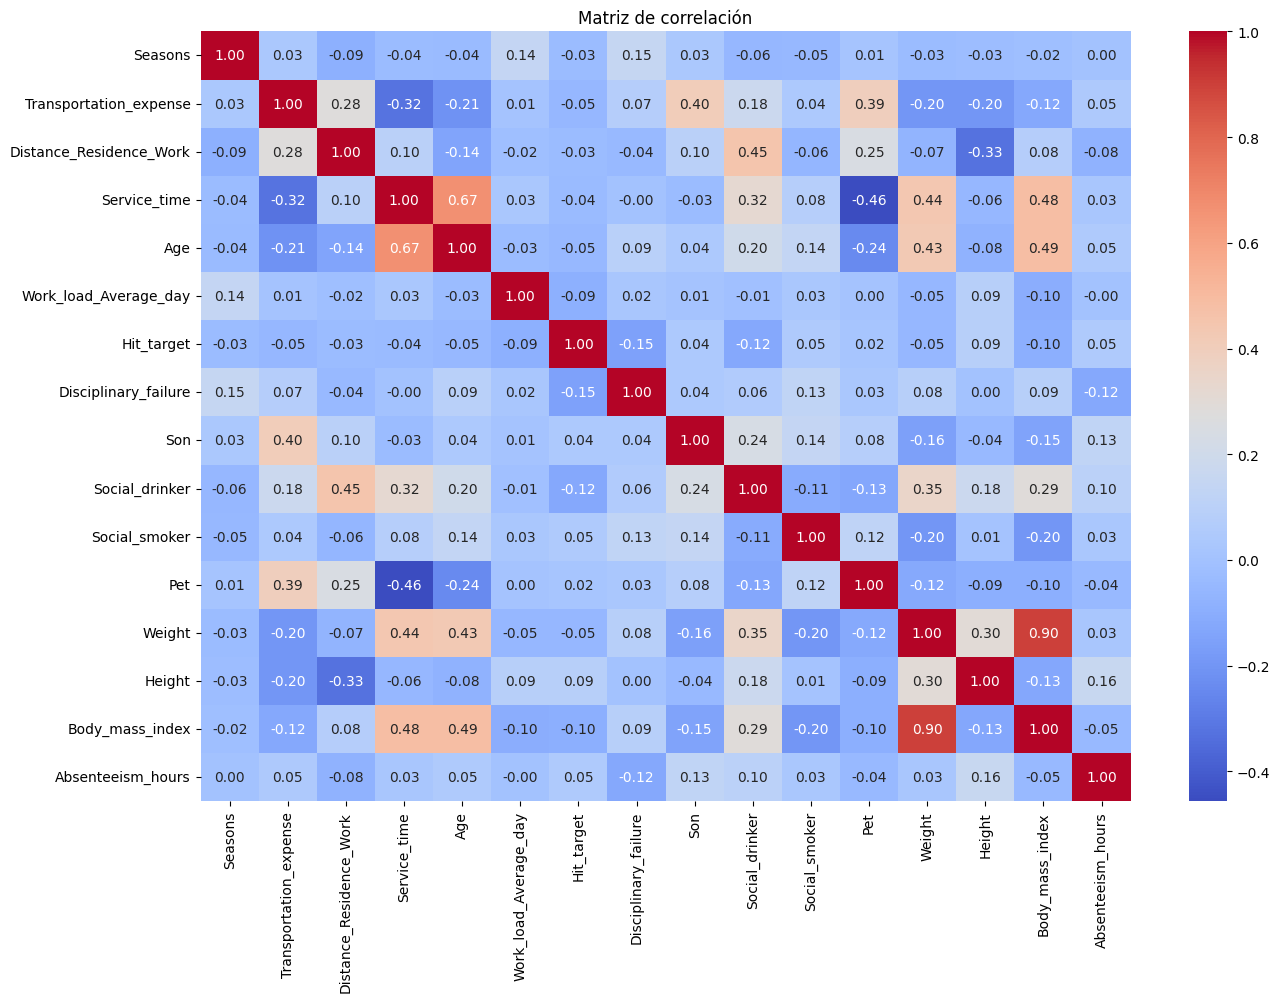

In [117]:
# Matriz de correlación numérica
plt.figure(figsize=(15, 10))
sns.heatmap(df_absences.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Estadísticas descriptivas de Absenteeism_hours:
count    1050.000000
mean        7.300952
std        13.623247
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max       120.000000
Name: Absenteeism_hours, dtype: float64


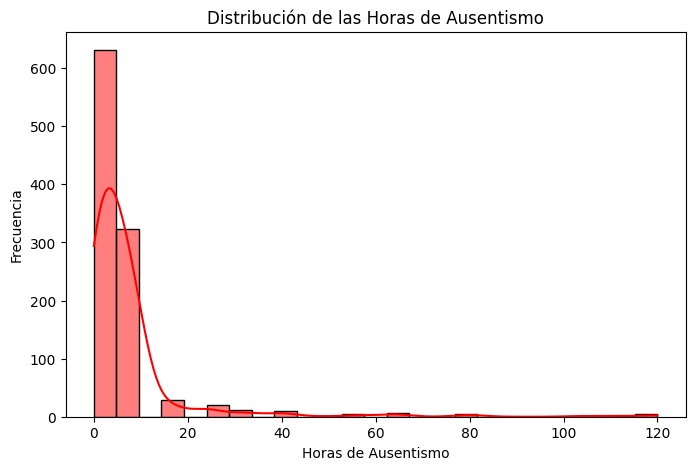

In [170]:
print("\nEstadísticas descriptivas de Absenteeism_hours:")
print(df_absences['Absenteeism_hours'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df_absences['Absenteeism_hours'], bins=25, kde=True, color='red', edgecolor='black')
plt.title('Distribución de las Horas de Ausentismo')
plt.xlabel('Horas de Ausentismo')
plt.ylabel('Frecuencia')
plt.show()

In [119]:
# Calcular media y desviación estándar de la columna 'Absenteeism_hours'
df_mean = df_absences['Absenteeism_hours'].mean()
df_std_dev = df_absences['Absenteeism_hours'].std()

# Calcular los límites inferior y superior para detectar outliers
lower_limit = df_mean - 3 * df_std_dev
upper_limit = df_mean+ 3 * df_std_dev

print(f"df_mean: {round(df_mean,3)}")
print(f"df_std_dev: {round(df_std_dev,3)}")
print(f"lower_limit: {round(lower_limit,3)}")
print(f"upper_limit: {round(upper_limit,3)}")        

# Identificar a los outliers
outliers = df_absences[(df_absences['Absenteeism_hours'] < lower_limit) | (df_absences['Absenteeism_hours'] > upper_limit)]

outliers

df_mean: 7.301
df_std_dev: 13.623
lower_limit: -33.569
upper_limit: 48.171


,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
161,9,6,Jul,Tue,1,228,14,16,58,264.604,...,1,2,False,False,1,65,172,22,120,winter
168,9,12,Mar,Tue,2,228,14,16,58,222.196,...,1,2,False,False,1,65,172,22,112,summer
199,11,19,Mar,Mon,3,289,36,13,33,222.196,...,1,2,True,False,1,90,172,30,104,autumn
239,13,13,Jul,Mon,1,369,17,12,31,264.604,...,1,3,True,False,0,70,169,25,80,winter
255,14,11,Nov,Mon,4,155,12,14,34,284.031,...,1,2,True,False,0,95,196,25,120,spring
274,14,18,Dec,Tue,2,155,12,14,34,280.549,...,1,2,True,False,0,95,196,25,80,summer
383,20,19,Apr,Fri,3,260,50,11,36,326.452,...,1,4,True,False,0,65,168,23,56,autumn
417,22,1,Oct,Wed,4,179,26,9,30,265.017,...,3,0,False,False,0,56,171,19,64,spring
494,26,19,May,Fri,3,300,26,13,43,237.656,...,1,2,True,True,1,77,175,25,64,autumn
570,28,9,Jul,Tue,1,225,26,9,28,230.290,...,1,1,False,False,2,69,169,24,112,winter


In [120]:
# Identificar a los que no se ausentan
no_absences = df_absences.groupby('ID')['Absenteeism_hours'].sum().reset_index()
no_absences = no_absences[no_absences['Absenteeism_hours'] == 0]['ID'].unique()
no_absences

array(['112', '150', '214', '215', '272', '294', '297', '331', '337',
       '354', '44', '47', '8', '84', '89'], dtype=object)

C:\Users\eniom\AppData\Local\Temp\ipykernel_22768\3131512788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absences['Month_absence'] = pd.Categorical(df_absences['Month_absence'], categories=month_order, ordered=True)


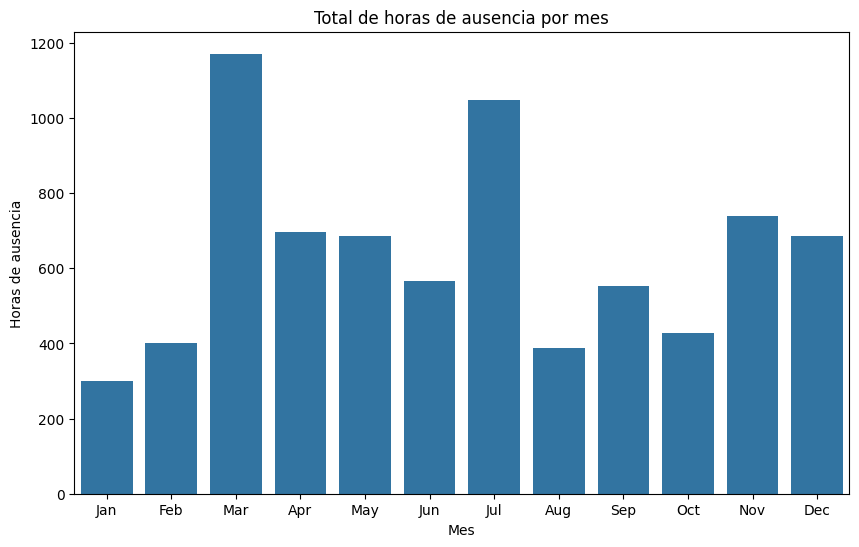

In [121]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Columna Month_absences a categórica ordenada
df_absences['Month_absence'] = pd.Categorical(df_absences['Month_absence'], categories=month_order, ordered=True)

# Ausentismo por mes:  Meses pico Julio y Marzo
plt.figure(figsize=(10,6))
sns.barplot(x='Month_absence', y='Absenteeism_hours', data=df_absences, estimator='sum',errorbar=None)
plt.title('Total de horas de ausencia por mes')
plt.xlabel('Mes')
plt.ylabel('Horas de ausencia')
plt.show()

In [122]:
# Trabajadores activos por mes
active_workers_month = df_absences.groupby('Month_absence', observed=True)['ID'].nunique()
active_workers_month

Month_absence
Jan    34
Feb    54
Mar    59
Apr    44
May    51
Jun    56
Jul    53
Aug    38
Sep    55
Oct    45
Nov    54
Dec    39
Name: ID, dtype: int64

In [123]:
# Total de horas de ausenrismo por mes
absenteeism_hours_month = df_absences.groupby('Month_absence', observed=True)['Absenteeism_hours'].sum()
absenteeism_hours_month

Month_absence
Jan     301
Feb     401
Mar    1171
Apr     696
May     687
Jun     565
Jul    1049
Aug     389
Sep     554
Oct     428
Nov     740
Dec     685
Name: Absenteeism_hours, dtype: int64

In [124]:
absenteeism_rate_capita = round(absenteeism_hours_month / active_workers_month, 2) # absenteeism_hours_month / active_workers_month
absenteeism_rate_capita

Month_absence
Jan     8.85
Feb     7.43
Mar    19.85
Apr    15.82
May    13.47
Jun    10.09
Jul    19.79
Aug    10.24
Sep    10.07
Oct     9.51
Nov    13.70
Dec    17.56
dtype: float64

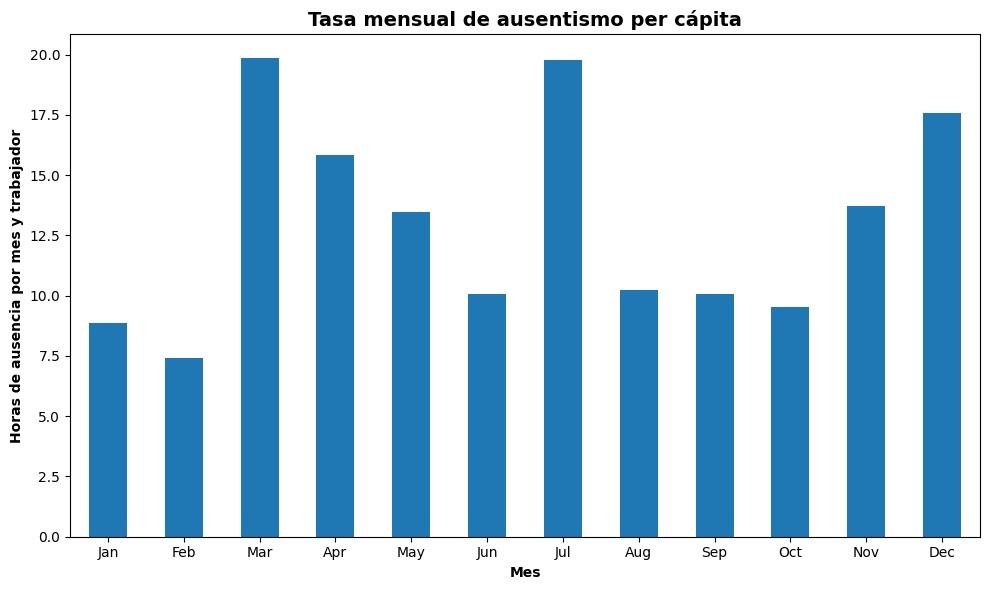

In [125]:
# kpi: tasa mensual de ausentismo per capita
absenteeism_rate_capita = round(absenteeism_hours_month / active_workers_month, 2) # absenteeism_hours_month / active_workers_month

plt.figure(figsize=(10,6))
absenteeism_rate_capita.plot.bar()
plt.title('Tasa mensual de ausentismo per cápita', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Horas de ausencia por mes y trabajador', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [126]:
absenteeism_reasons

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name
0,1,22-Follow-up,Jul,Mon,1,235,11,14,37,239.554,...,3,1,False,False,1,88,172,29,8,winter
1,1,22-Follow-up,May,Mon,3,235,11,14,37,237.656,...,3,1,False,False,1,88,172,29,8,autumn
2,1,23-Consultation,Aug,Thu,1,235,11,14,37,205.917,...,3,1,False,False,1,88,172,29,4,winter
3,1,11-Digestive,Jul,Tue,1,235,11,14,37,264.604,...,3,1,False,False,1,88,172,29,4,winter
4,1,23-Consultation,Aug,Tue,1,235,11,14,37,249.797,...,3,1,False,False,1,88,172,29,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,382,23-Consultation,Sep,Mon,1,118,10,10,37,241.476,...,1,0,False,False,0,83,172,28,4,winter
1052,383,22-Follow-up,Mar,Tue,2,378,49,11,36,244.387,...,1,2,False,True,4,65,174,21,8,summer
1053,384,5-Mental,Jul,Fri,1,118,10,10,37,275.312,...,1,0,False,False,0,83,172,28,8,winter
1054,385,27-Physiotherapy,Feb,Thu,2,179,51,18,38,264.249,...,1,0,True,False,0,89,170,31,3,summer


In [127]:
# Agrupo por Reason_absence y calculo la suma de las horas de ausentismo
absenteeism_ordered = absenteeism_reasons.groupby('Reason_absence')['Absenteeism_hours'].sum().sort_values()
absenteeism_ordered

Reason_absence
16-Perinatal             7
4-Endocrine              9
17-Congenital           16
15-Pregnancy            16
3-Blood / Immune        16
2-Neoplasms             24
5-Mental                27
24-Blood donation       32
21-Health Factors       69
8-Ear                   70
25-Lab exam            145
27-Physiotherapy       178
6-Nervous              190
12-Skin                205
7-Eye                  210
1-Infectious           222
9-Circulatory          224
14-Genitourinary       295
10-Respiratory         364
18-Symptoms            365
26-Unjustified         376
28-Dental              457
22-Follow-up           468
11-Digestive           510
23-Consultation        667
13-Musculoskeletal    1191
19-Injury             1313
Name: Absenteeism_hours, dtype: int64

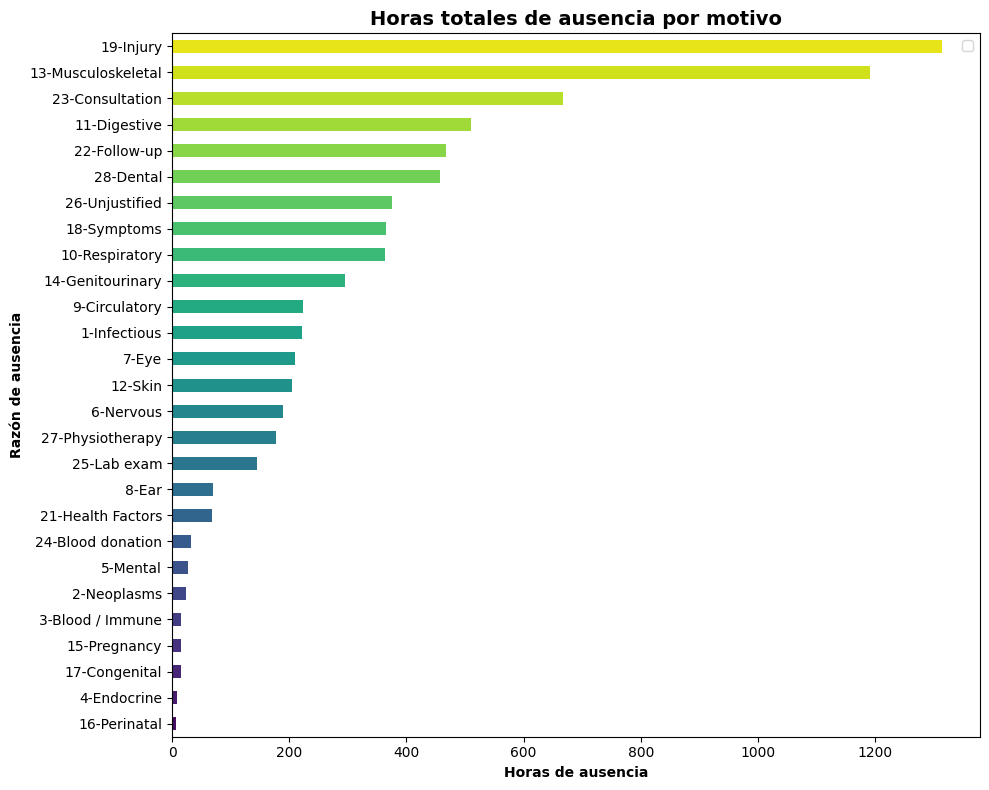

In [128]:
# Graficar las horas totales de ausencia por motivo
colors = sns.color_palette('viridis', n_colors=27)

plt.figure(figsize=(10,8))
absenteeism_ordered.plot.barh(color=colors)
plt.title('Horas totales de ausencia por motivo', fontsize=14, fontweight='bold')
plt.xlabel('Horas de ausencia', fontweight='bold')
plt.ylabel('Razón de ausencia', fontweight='bold')
plt.legend('')
plt.tight_layout()
plt.show()

In [129]:
absenteeism_ordered.sort_values(ascending=False)

Reason_absence
19-Injury             1313
13-Musculoskeletal    1191
23-Consultation        667
11-Digestive           510
22-Follow-up           468
28-Dental              457
26-Unjustified         376
18-Symptoms            365
10-Respiratory         364
14-Genitourinary       295
9-Circulatory          224
1-Infectious           222
7-Eye                  210
12-Skin                205
6-Nervous              190
27-Physiotherapy       178
25-Lab exam            145
8-Ear                   70
21-Health Factors       69
24-Blood donation       32
5-Mental                27
2-Neoplasms             24
17-Congenital           16
3-Blood / Immune        16
15-Pregnancy            16
4-Endocrine              9
16-Perinatal             7
Name: Absenteeism_hours, dtype: int64

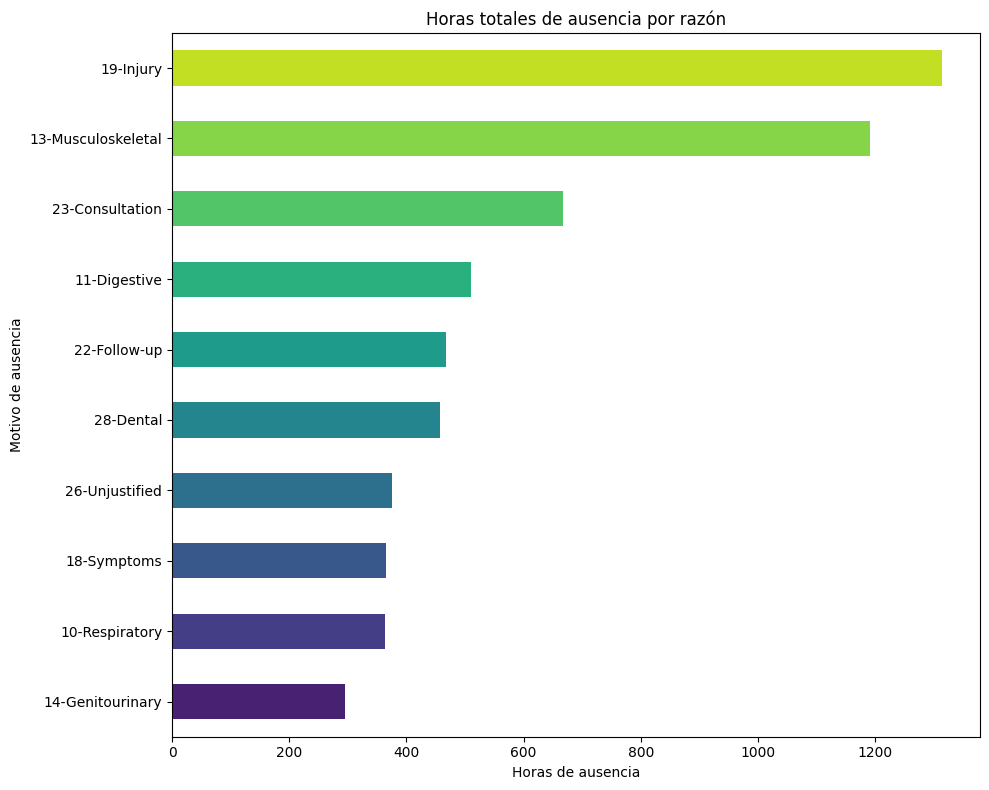

In [130]:
# Graficar Top Ten de causas de ausentismo general
Top10_reasons = absenteeism_ordered.tail(10)

plt.figure(figsize=(10,8))
colors = sns.color_palette('viridis', n_colors=10)
Top10_reasons.plot.barh(color=colors)

plt.title('Horas totales de ausencia por razón')
plt.xlabel('Horas de ausencia')
plt.ylabel('Motivo de ausencia')
plt.tight_layout()
plt.show()

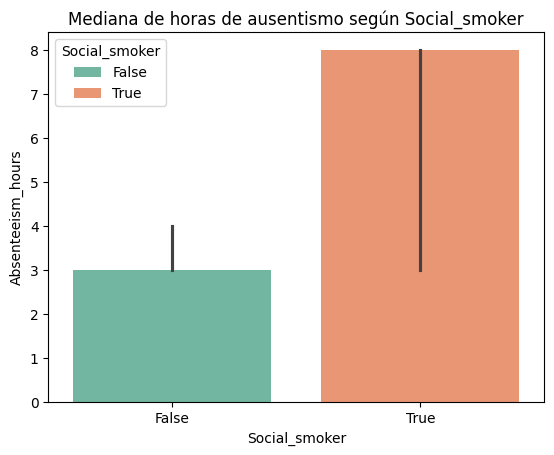

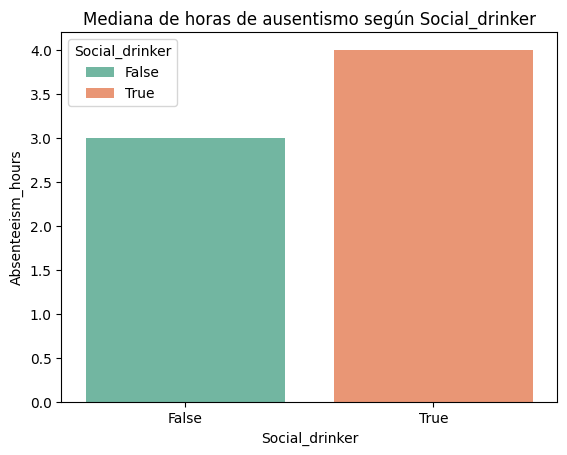

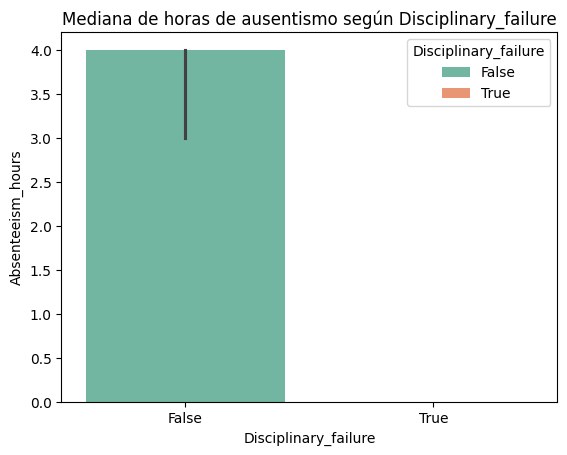

In [131]:
# OJO:  este gráfico me permite ver muy claramente la mediana.  Pero no considera los rangos intercuartilicos.  No es la merjo opcion, incluso si uso errorbar=("ci", 95)
for col in ["Social_smoker", "Social_drinker", "Disciplinary_failure"]:
    sns.barplot(x=col, y="Absenteeism_hours", data=df_absences, estimator="median", errorbar=("ci",95), hue=col, palette="Set2")
    plt.title(f"Mediana de horas de ausentismo según {col}")
    plt.show()


C:\Users\eniom\AppData\Local\Temp\ipykernel_22768\1940579453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Social_smoker', y='Absenteeism_hours', data=df_absences,


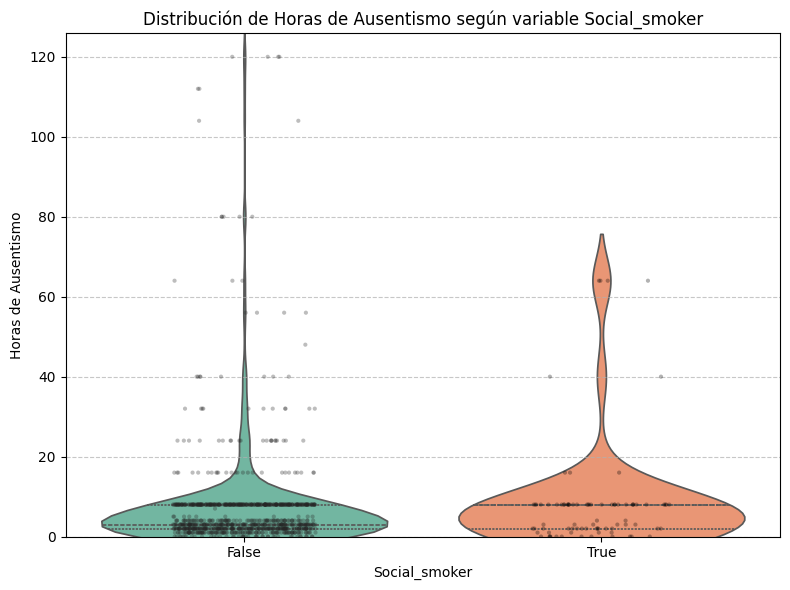

In [132]:
# Variable independiente (con 2 niveles) Social_smoker - Variable dependiente: Absenteeism_hours

plt.figure(figsize=(8, 6)) # Tamaño de la figura para una mejor visualización

sns.violinplot(x='Social_smoker', y='Absenteeism_hours', data=df_absences,
               inner='quartile', palette='Set2')

# Superponner el stripplot
sns.stripplot(x='Social_smoker', y='Absenteeism_hours', data=df_absences,
              hue='Social_smoker', legend= False, palette='dark:black', jitter=0.2, alpha=0.3, size=3) 


plt.title('Distribución de Horas de Ausentismo según variable Social_smoker')
plt.xlabel('Social_smoker')
plt.ylabel('Horas de Ausentismo')

# Ajustar el límite del eje Y para que comience en 0 
plt.ylim(0, df_absences['Absenteeism_hours'].max() * 1.05) # Margen en la parte superior

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

In [133]:
df_no_smoker = df_absences[df_absences['Social_smoker'] == False]
no_smoker_counts = df_no_smoker['ID'].nunique()  # 345 empleados no fumadores
no_smoker_hours_sum = df_no_smoker['Absenteeism_hours'].sum()  # 6949 horas de ausentismo anuales
print(f"Numero de empleados no fumadores: {no_smoker_counts}.\nHoras de ausentismo no fumadores: {no_smoker_hours_sum}.")

Numero de empleados no fumadores: 345.
Horas de ausentismo no fumadores: 6949.


In [134]:
# Serie de las horas de ausentismo de los empleados no fumadores
no_smokers_absent_hours = df_no_smoker['Absenteeism_hours']
no_smokers_absent_hours

0       8
1       8
2       4
3       4
4       4
       ..
1050    1
1051    4
1053    8
1054    3
1055    2
Name: Absenteeism_hours, Length: 967, dtype: int64

In [135]:
df_smoker = df_absences[df_absences['Social_smoker'] == True]
smoker_counts=df_smoker['ID'].nunique()  # 36 empleados fumadores
smoker_hours_sum = df_smoker['Absenteeism_hours'].sum()  # 717 horas de ausentismo anuales
print(f"Numero de empleados fumadores: {smoker_counts}.\nHoras de ausentismo fumadores: {smoker_hours_sum}.")

Numero de empleados fumadores: 36.
Horas de ausentismo fumadores: 717.


In [136]:
# Serie de las horas de ausentismo de los empleados fumadores
smokers_absent_hours = df_smoker['Absenteeism_hours']
smokers_absent_hours

23       8
24       1
25       8
26       0
27       8
        ..
1033     8
1043     8
1045    64
1047     8
1052     8
Name: Absenteeism_hours, Length: 83, dtype: int64

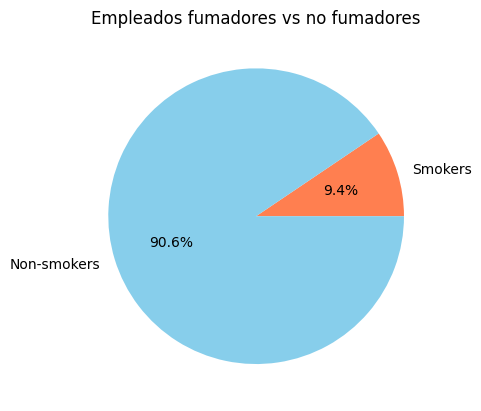

In [137]:
#  Empleados Smoker vs No Smoker
colors=[ 'coral', 'skyblue']
labels = ['Smokers', 'Non-smokers']
sizes = [smoker_counts, no_smoker_counts]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Empleados fumadores vs no fumadores')
plt.show()

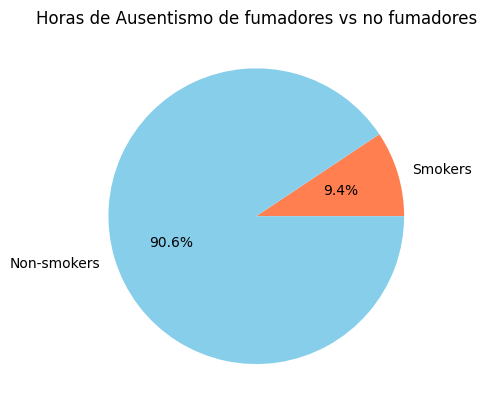

In [138]:
#  Horas de ausentismo Smoker vs No Smoker
colors=['coral', 'skyblue']
labels = ['Smokers', 'Non-smokers']
sizes = [smoker_hours_sum, no_smoker_hours_sum]

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title('Horas de Ausentismo de fumadores vs no fumadores')
plt.show()

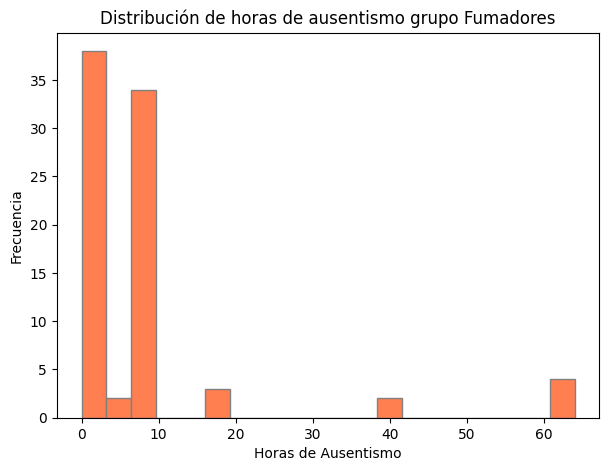

In [154]:
# Distribucion general de las horas de ausentismo de Smokers
plt.figure(figsize=(7,5))
df_smoker['Absenteeism_hours'].plot.hist(bins=20, color= 'coral', edgecolor='grey')

plt.title('Distribución de horas de ausentismo grupo Fumadores')
plt.xlabel('Horas de Ausentismo')
plt.ylabel('Frecuencia')
plt.show()

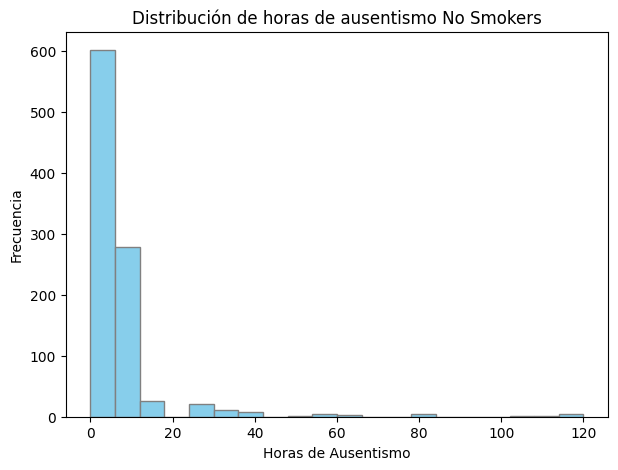

In [155]:
# Distribucion general de las horas de ausentismo de No Smokers
plt.figure(figsize=(7,5))
df_no_smoker['Absenteeism_hours'].plot.hist(bins=20, color= 'skyblue', edgecolor='grey')

plt.title('Distribución de horas de ausentismo No Smokers')
plt.xlabel('Horas de Ausentismo')
plt.ylabel('Frecuencia')
plt.show()

In [141]:
# Prueba t de Welch : Smokers vs No Smokers
# H0 : "No hay diferencia estadísticamente significativa en las horas promedio de ausentismo entre fumadores y no fumadores"
# H1 : "Si hay diferencia estadísticamente significativa en las horas promedio de ausentismo entre fumadores y no fumadores"

# Usamos equal_var=False para indicar que no asumimos varianzas iguales
t_stats, p_value = stats.ttest_ind(smokers_absent_hours, no_smokers_absent_hours, equal_var=False)

print("\n--- Resultados de la Prueba t de Welch ---")
print(f"Estadístico t: {t_stats:.3f}")
print(f"Valor p: {p_value:.4f}")

# Definir nivel de significancia
alpha = 0.05


if p_value < alpha:
    print(f"\nConclusión: Con un valor p de {p_value:.4f} (menor que {alpha}),")
    print("se RECHAZA la hipótesis nula. Hay una diferencia estadísticamente significativa en las horas promedio de ausentismo entre fumadores y no fumadores.")
else:
    print(f"\nConclusión: Con un valor p de {p_value:.4f} (mayor o igual que {alpha}),")
    print("NO se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar una diferencia estadísticamente significativa en las horas promedio de ausentismo entre fumadores y no fumadores.")

print(f"\nMedia de Horas de Ausentismo para Fumadores: {smokers_absent_hours.mean():.2f}")
print(f"Media de Horas de Ausentismo para No Fumadores: {no_smokers_absent_hours.mean():.2f}")


--- Resultados de la Prueba t de Welch ---
Estadístico t: 0.899
Valor p: 0.3712

Conclusión: Con un valor p de 0.3712 (mayor o igual que 0.05),
NO se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar una diferencia estadísticamente significativa en las horas promedio de ausentismo entre fumadores y no fumadores.

Media de Horas de Ausentismo para Fumadores: 8.64
Media de Horas de Ausentismo para No Fumadores: 7.19


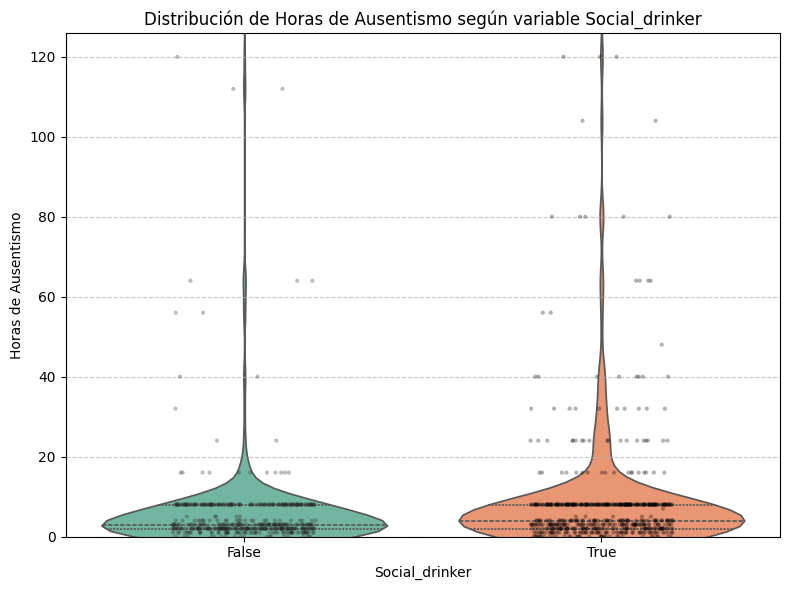

In [142]:
# Variable independiente (con 2 niveles) Social_drinker - Variable dependiente: Absenteeism_hours

plt.figure(figsize=(8, 6)) # Tamaño de la figura para una mejor visualización

sns.violinplot(x='Social_drinker', y='Absenteeism_hours', data=df_absences,
               hue= 'Social_drinker', legend=False, inner='quartile', palette='Set2')

# Superponer stripplotlos puntos de datos individuales (jittered)
sns.stripplot(x='Social_drinker', y='Absenteeism_hours', data=df_absences,
              hue='Social_drinker', legend=False, palette='dark:black', jitter=0.2, alpha=0.3, size=3) 

plt.title('Distribución de Horas de Ausentismo según variable Social_drinker')
plt.xlabel('Social_drinker')
plt.ylabel('Horas de Ausentismo')
plt.ylim(0, df_absences['Absenteeism_hours'].max() * 1.05) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

In [143]:
df_no_drinker = df_absences[df_absences['Social_drinker'] == False]
no_drinker_counts =df_no_drinker['ID'].nunique()  # 179 empleados no bebedores
no_drinker_hours_sum = df_no_drinker['Absenteeism_hours'].sum()  # 2681 horas de ausentismo anuales
print(f"Numero de empleados no bebedores: {no_drinker_counts}.\nHoras de ausentismo no bebedores: {no_drinker_hours_sum}.")

Numero de empleados no bebedores: 179.
Horas de ausentismo no bebedores: 2681.


In [144]:
df_drinker = df_absences[df_absences['Social_drinker'] == True]
drinker_counts = df_drinker['ID'].nunique()  # 203 empleados no bebedores
drinker_hours_sum = df_drinker['Absenteeism_hours'].sum()  # 4985horas de ausentismo anuales
print(f"Número de empleados bebedores: {drinker_counts}.\n Horas de ausentimo bebedores: {drinker_hours_sum}")

Número de empleados bebedores: 203.
 Horas de ausentimo bebedores: 4985


In [145]:
# Serie de las horas de ausentismo de los empleados no bebedores
no_drinkers_absent_hours = df_no_drinker['Absenteeism_hours']
no_drinkers_absent_hours

0       8
1       8
2       4
3       4
4       4
       ..
1049    1
1050    1
1051    4
1052    8
1053    8
Name: Absenteeism_hours, Length: 468, dtype: int64

In [146]:
# Serie de las horas de ausentismo de los empleados bebedores
drinkers_absent_hours = df_drinker['Absenteeism_hours']
drinkers_absent_hours

29       8
30       3
31       4
32       2
33       2
        ..
1045    64
1046     8
1048     8
1054     3
1055     2
Name: Absenteeism_hours, Length: 582, dtype: int64

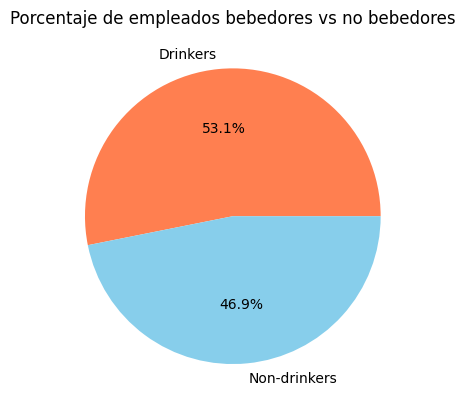

In [147]:
#  Empleados Drinkers vs No Drinkers
colors=['coral', 'skyblue']
labels = ['Drinkers', 'Non-drinkers']
sizes = [drinker_counts, no_drinker_counts]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de empleados bebedores vs no bebedores')
plt.show()

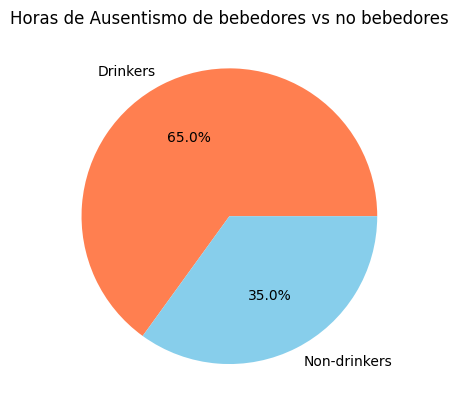

In [148]:
#  Horas de ausentismo Drinker vs No Drinker
colors=['coral', 'skyblue']
labels = ['Drinkers', 'Non-drinkers']
sizes = [drinker_hours_sum, no_drinker_hours_sum]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Horas de Ausentismo de bebedores vs no bebedores')
plt.show()

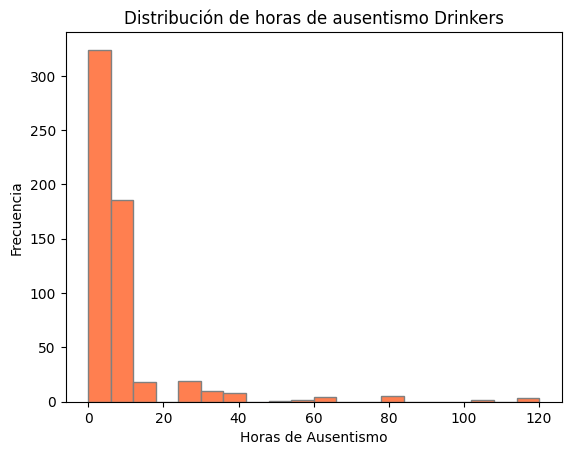

In [149]:
# Distribucion general de las horas de ausentismo de No Drinkers
df_drinker['Absenteeism_hours'].plot.hist(bins=20, color= 'coral', edgecolor='grey')

plt.title('Distribución de horas de ausentismo Drinkers')
plt.xlabel('Horas de Ausentismo')
plt.ylabel('Frecuencia')
plt.show()

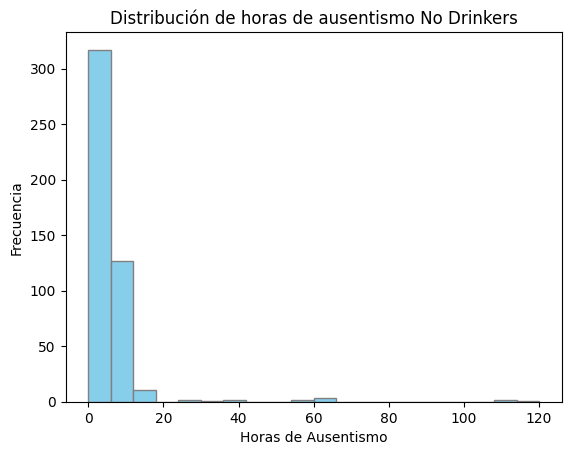

In [150]:
# Distribucion general de las horas de ausentismo de No Drinkers
df_no_drinker['Absenteeism_hours'].plot.hist(bins=20, color= 'skyblue', edgecolor='grey')

plt.title('Distribución de horas de ausentismo No Drinkers')
plt.xlabel('Horas de Ausentismo')
plt.ylabel('Frecuencia')
plt.show()

In [151]:
# Prueba t de Welch : Drinkers vs No Drinkers
# H0 : "No hay diferencia estadísticamente significativa en las horas promedio de ausentismo entre bebedores y no bebedores"
# H1 : "Si hay diferencia estadísticamente significativa en las horas promedio de ausentismo entre bebedores y no bebedores"
# Usamos equal_var=False para indicar que no pensamos que las varianzas son iguales

t_stats, p_value = stats.ttest_ind(drinkers_absent_hours, no_drinkers_absent_hours, equal_var=False)

print("\n--- Resultados de la Prueba t de Welch ---")
print(f"Estadístico t: {t_stats:.4f}")
print(f"Valor p: {p_value:.4f}")

# Nivel de significancia
alpha = 0.05

# Resultado
if p_value < alpha:
    print(f"\nConclusión: Con un valor p de {p_value:.4f} (menor que {alpha}),")
    print("se RECHAZA la hipótesis nula. Hay una diferencia estadísticamente significativa en las horas promedio de ausentismo entre bebedores y no bebedores.")
else:
    print(f"\nConclusión: Con un valor p de {p_value:.4f} (mayor o igual que {alpha}),")
    print("NO se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar una diferencia estadísticamente significativa en las horas promedio de ausentismo entre bebedores y no bebedores.")

print(f"\nMedia de Horas de Ausentismo para Bebedores: {drinkers_absent_hours.mean():.2f}")
print(f"Media de Horas de Ausentismo para No Bebedores: {no_drinkers_absent_hours.mean():.2f}")


--- Resultados de la Prueba t de Welch ---
Estadístico t: 3.4707
Valor p: 0.0005

Conclusión: Con un valor p de 0.0005 (menor que 0.05),
se RECHAZA la hipótesis nula. Hay una diferencia estadísticamente significativa en las horas promedio de ausentismo entre bebedores y no bebedores.

Media de Horas de Ausentismo para Bebedores: 8.57
Media de Horas de Ausentismo para No Bebedores: 5.73


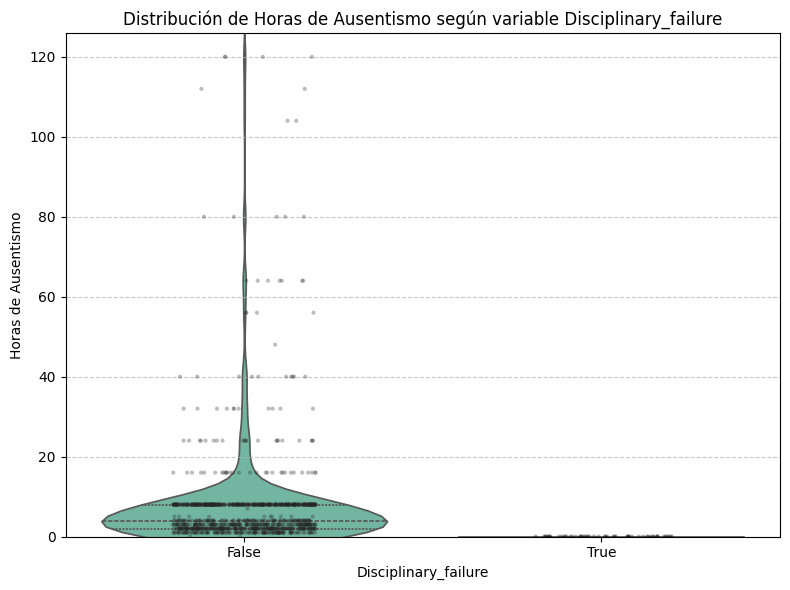

In [156]:
# Variable independiente Disciplinary_failure - Variable dependiente: Absenteeism_hours

plt.figure(figsize=(8, 6)) # Tamaño de la figura para una mejor visualización

sns.violinplot(x='Disciplinary_failure', y='Absenteeism_hours', data=df_absences,
               hue= 'Disciplinary_failure', legend= False, inner='quartile', palette='Set2')

sns.stripplot(x='Disciplinary_failure', y='Absenteeism_hours', data=df_absences,
              hue= 'Disciplinary_failure', legend= False, palette='dark:black', jitter=0.2, alpha=0.3, size=3) 
 
plt.title('Distribución de Horas de Ausentismo según variable Disciplinary_failure')
plt.xlabel('Disciplinary_failure')
plt.ylabel('Horas de Ausentismo')
plt.ylim(0, df_absences['Absenteeism_hours'].max() * 1.05) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

In [157]:
# Prueba t de Welch : Infractores vs No Infractores
# H0 : "No hay diferencia estadísticamente significativa en las horas promedio de ausentismo entre los que tienen faltas disciplinarias y los que no tienen faltas disciplinarias"
# H1 : "Si hay diferencia estadísticamente significativa en las horas promedio de ausentismo entre los que tienen faltas disciplinarias y los que no tienen faltas disciplinarias"
# Usamos equal_var=False para indicar que no pensamos que las varianzas son iguales

no_infractors = df_absences[df_absences['Disciplinary_failure'] == False]['Absenteeism_hours']
infractors = df_absences[df_absences['Disciplinary_failure'] == True]['Absenteeism_hours']

stat, p = ttest_ind(no_infractors, infractors, equal_var=False)

print("\n--- Resultados de la Prueba t de Welch ---")
print(f"Estadístico t: {stat:.3f}")
print(f"Valor p: {p:.4f}")

# Definir el nivel de significancia
alpha = 0.05

# Resultado
if p < alpha:
    print(f"\nConclusión: Con un valor p de {p:.4f} (menor que {alpha}),")
    print("se RECHAZA la hipótesis nula. Hay una diferencia estadísticamente significativa en las horas promedio de ausentismo entre los que tienen faltas disciplinarias y los que no tienen faltas disciplinarias.")
else:
    print(f"\nConclusión: Con un valor p de {p:.4f} (mayor o igual que {alpha}),")
    print("NO se RECHAZA la hipótesis nula. Hay una diferencia estadísticamente significativa en las horas promedio de ausentismo entre los que tienen faltas disciplinarias y los que no tienen faltas disciplinarias.")

print(f"\nMedia de Horas de Ausentismo para Infractores: {infractors.mean():.2f}")
print(f"Media de Horas de Ausentismo para No Infractores: {no_infractors.mean():.2f}")



--- Resultados de la Prueba t de Welch ---
Estadístico t: 17.500
Valor p: 0.0000

Conclusión: Con un valor p de 0.0000 (menor que 0.05),
se RECHAZA la hipótesis nula. Hay una diferencia estadísticamente significativa en las horas promedio de ausentismo entre los que tienen faltas disciplinarias y los que no tienen faltas disciplinarias.

Media de Horas de Ausentismo para Infractores: 0.00
Media de Horas de Ausentismo para No Infractores: 7.69


In [158]:
no_infractors = df_absences[df_absences['Disciplinary_failure'] == False]['Absenteeism_hours']
no_infractors

0       8
1       8
2       4
3       4
4       4
       ..
1051    4
1052    8
1053    8
1054    3
1055    2
Name: Absenteeism_hours, Length: 997, dtype: int64

In [159]:

infractors = df_absences[df_absences['Disciplinary_failure'] == True]['Absenteeism_hours']
infractors

15      0
26      0
28      0
53      0
127     0
130     0
133     0
134     0
140     0
155     0
157     0
159     0
196     0
210     0
242     0
248     0
302     0
303     0
341     0
343     0
359     0
366     0
367     0
389     0
402     0
446     0
451     0
452     0
470     0
520     0
578     0
582     0
590     0
608     0
674     0
675     0
676     0
699     0
700     0
701     0
713     0
716     0
753     0
758     0
781     0
819     0
883     0
884     0
941     0
963     0
966     0
1006    0
1023    0
Name: Absenteeism_hours, dtype: int64

In [161]:
# Las variable Absenteeism_hours tiene valores muy sesgados hacia la derecha por lo que vamos a aplicar el logaritmo. 
# Agregamos una columna Absenteeism_hours_log que tiene los valores de Absenteeism_hours con el logaritmo + 1
df_absences['log_Absenteeism_hours'] = np.log(df_absences['Absenteeism_hours'] + 1)
df_absences.info()
df_absences.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1055
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       1050 non-null   object  
 1   Reason_absence           1050 non-null   object  
 2   Month_absence            1050 non-null   category
 3   Day_week                 1050 non-null   object  
 4   Seasons                  1050 non-null   int64   
 5   Transportation_expense   1050 non-null   int64   
 6   Distance_Residence_Work  1050 non-null   int64   
 7   Service_time             1050 non-null   int64   
 8   Age                      1050 non-null   int64   
 9   Work_load_Average_day    1050 non-null   float64 
 10  Hit_target               1050 non-null   int64   
 11  Disciplinary_failure     1050 non-null   bool    
 12  Education                1050 non-null   object  
 13  Son                      1050 non-null   int64   
 14  Social_drinke

C:\Users\eniom\AppData\Local\Temp\ipykernel_22768\346118030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absences['log_Absenteeism_hours'] = np.log(df_absences['Absenteeism_hours'] + 1)


,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,Season_name,log_Absenteeism_hours
0,1,22,Jul,Mon,1,235,11,14,37,239.554,...,1,False,False,1,88,172,29,8,winter,2.197225
1,1,22,May,Mon,3,235,11,14,37,237.656,...,1,False,False,1,88,172,29,8,autumn,2.197225
2,1,23,Aug,Thu,1,235,11,14,37,205.917,...,1,False,False,1,88,172,29,4,winter,1.609438
3,1,11,Jul,Tue,1,235,11,14,37,264.604,...,1,False,False,1,88,172,29,4,winter,1.609438
4,1,23,Aug,Tue,1,235,11,14,37,249.797,...,1,False,False,1,88,172,29,4,winter,1.609438


In [162]:
df_absences[['Absenteeism_hours', 'log_Absenteeism_hours']].head()

,Absenteeism_hours,log_Absenteeism_hours
0,8,2.197225
1,8,2.197225
2,4,1.609438
3,4,1.609438
4,4,1.609438


In [163]:
df_absences['log_Absenteeism_hours'].describe()

count    1050.000000
mean        1.631521
std         0.867144
min         0.000000
25%         1.098612
50%         1.386294
75%         2.197225
max         4.795791
Name: log_Absenteeism_hours, dtype: float64

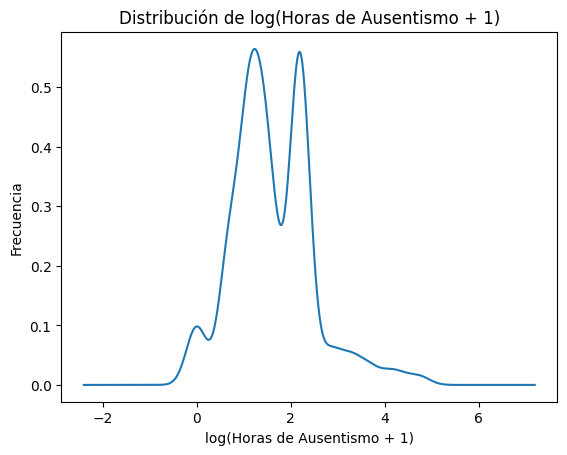

In [ ]:
df_absences['log_Absenteeism_hours'].plot.kde()
plt.title('Distribución de log(Horas de Ausentismo + 1)')
plt.xlabel('log(Horas de Ausentismo + 1)')
plt.ylabel('Frecuencia')
plt.show()


Estadísticas descriptivas de la variable dependiente transformada:
count    1050.000000
mean        1.631521
std         0.867144
min         0.000000
25%         1.098612
50%         1.386294
75%         2.197225
max         4.795791
Name: log_Absenteeism_hours, dtype: float64


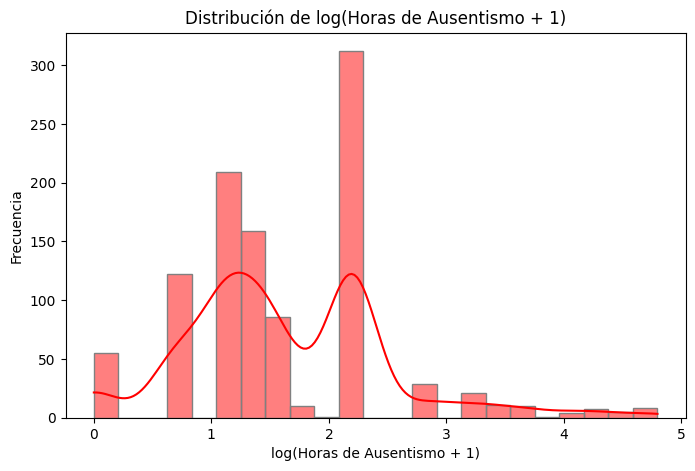

In [177]:
print("\nEstadísticas descriptivas de la variable dependiente transformada:")
print(df_absences['log_Absenteeism_hours'].describe())

# Opcional: Visualizar la distribución 
plt.figure(figsize=(8, 5))
sns.histplot(df_absences['log_Absenteeism_hours'], kde=True, color='red', edgecolor='grey')
plt.title('Distribución de log(Horas de Ausentismo + 1)')
plt.xlabel('log(Horas de Ausentismo + 1)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# --- REGRESION CUANTIL --- 

# Definir fórmula del modelo
formula = 'log_Absenteeism_hours ~ Social_smoker + Social_drinker + Disciplinary_failure'

In [165]:
# --- MODELO PARA LA MEDIANA (q = 0.50) ---
print("\n--- Regresión Cuantil para la Mediana (q=0.50) ---")
model_median = smf.quantreg(formula, df_absences, q=0.5)
results_median = model_median.fit()
print(results_median.summary())

# --- MODELO PARA el Cuantil 0.25 ---
print("\n--- Regresión Cuantil para el Cuantil 0.25 (q=0.25) ---")
model_q25 = smf.quantreg(formula, df_absences, q=0.25)
results_q25 = model_q25.fit()
print(results_q25.summary())

# --- MODELO PARA el Cuantil 0.75 ---
print("\n--- Regresión Cuantil para el Cuantil 0.75 (q=0.75) ---")
model_q75 = smf.quantreg(formula, df_absences, q=0.75)
results_q75 = model_q75.fit()
print(results_q75.summary())


--- Regresión Cuantil para la Mediana (q=0.50) ---
                           QuantReg Regression Results                           
Dep. Variable:     log_Absenteeism_hours   Pseudo R-squared:               0.1385
Model:                          QuantReg   Bandwidth:                      0.3161
Method:                    Least Squares   Sparsity:                        1.666
Date:                  do., 20 jul. 2025   No. Observations:                 1050
Time:                           17:54:57   Df Residuals:                     1046
                                           Df Model:                            3
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.3863      0.040     34.571      0.000       1.308       1.465
Social_smoker[T.True]            0.5878      0.097      6.076      0.000       0.39

c:\Users\eniom\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['q']
  warnings.warn(msg, ValueWarning)
c:\Users\eniom\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['q']
  warnings.warn(msg, ValueWarning)
c:\Users\eniom\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['q']
  warnings.warn(msg, ValueWarning)
